<a href="https://colab.research.google.com/github/73hr4774/SVM-Classifier/blob/main/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

**Loading the** **Dataset**

In [ ]:
data=datasets.load_breast_cancer()
x=data.data
y=data.target

**Train & Test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Feature Scaling**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**SVM Classifier**

In [ ]:
svm_classifier=SVC(kernel='linear',C=1)
svm_classifier.fit(x_train,y_train)

SVC(C=1, kernel='linear')

**Predictions**

In [ ]:
y_pred=svm_classifier.predict(x_test)

**Evaluating the Model**

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

# **Visualizing results using PCA**




In [ ]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)

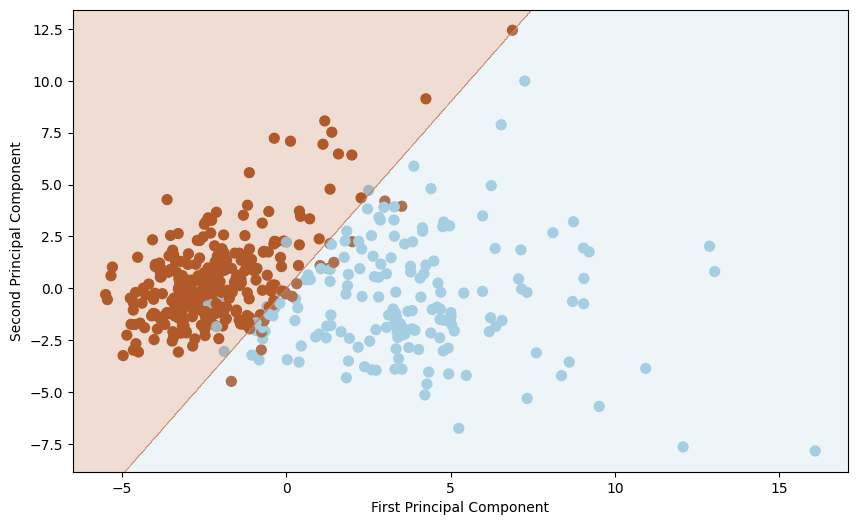

In [ ]:
plt.figure(figsize=(10,6))

#Plotting the train data
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plotting the decision boundary
h = .02
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()

**Results**

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

